### Sentiment Analysis using Naive Bayes & Logistic Regression on Customer Review of a Food and Beverage
Final project for "Business Intelligence" course 2023

GitHub project page:

In [ ]:
!pip install vaderSentiment
!pip install panda
!pip install seaborn
!pip install matplotlib
!pip install scikit-learn
!pip install nltk
!pip install contractions
!pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Load libraries
import pandas as pd
from sklearn import metrics
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#load product name
url='https://drive.google.com/file/d/1ExYO0YB65eDygCQ_BKYR-u3A9hpmeSFT/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
pname = pd.read_csv(url, usecols=['key', 'name'])
pname.head(10)

,key,name
0,0_bj,Salted Caramel Core
1,1_bj,Netflix & Chilll'd™
2,2_bj,Chip Happens
3,3_bj,Cannoli
4,4_bj,Gimme S’more!™
5,5_bj,Peanut Butter Half Baked®
6,6_bj,Berry Sweet Mascarpone
7,7_bj,Chocolate Peanut Butter Split
8,8_bj,Justice ReMix'd ™
9,9_bj,Boots on the Moooo’n™


In [ ]:
# Load review dataset
creviews = pd.read_csv('https://raw.githubusercontent.com/khawslee/Sentiment-Analysis-Using-Vader/main/reviews.csv')
creviews

,key,author,date,stars,title,helpful_yes,helpful_no,text
0,0_bj,Ilovebennjerry,2017-04-15,3,Not enough brownies!,10,3,"Super good, don't get me wrong. But I came for..."
1,0_bj,Sweettooth909,2020-01-05,5,I’m OBSESSED with this pint!,3,0,I decided to try it out although I’m not a hug...
2,0_bj,LaTanga71,2018-04-26,3,My favorite...More Caramel Please,5,2,My caramel core begins to disappear about half...
3,0_bj,chicago220,2018-01-14,5,Obsessed!!!,24,1,Why are people complaining about the blonde br...
4,0_bj,Kassidyk,2020-07-24,1,Worst Ice Cream Ever!,1,5,This ice cream is worst ice cream I’ve ever ta...
...,...,...,...,...,...,...,...,...
7938,56_bj,Shellyshellzs,2020-04-30,5,Peanut butter fudge heaven,0,0,Oh man I use to be a whatever was on sale girl...
7939,56_bj,Or1234,2020-02-24,5,The best Chocolate Ice Cream Combo,0,0,This is the first chocolate ice cream I’ve tri...
7940,56_bj,ava21,2020-01-31,5,PERFECT!!,0,0,This is the best pint of ice cream I've ever h...
7941,56_bj,yeee,2019-03-13,5,My favorite!,0,0,This is my favorite ice cream ever! Can't get ...


In [ ]:
merged_df = pd.merge(creviews, pname[['key', 'name']], on='key', how='left')
merged_df.rename(columns={'name': 'product_name'}, inplace=True)
cols = merged_df.columns.tolist()
cols.remove('product_name')
cols.insert(cols.index('key') + 1, 'product_name')
merged_df = merged_df.reindex(columns=cols)
merged_df.head(10)

,key,product_name,author,date,stars,title,helpful_yes,helpful_no,text
0,0_bj,Salted Caramel Core,Ilovebennjerry,2017-04-15,3,Not enough brownies!,10,3,"Super good, don't get me wrong. But I came for..."
1,0_bj,Salted Caramel Core,Sweettooth909,2020-01-05,5,I’m OBSESSED with this pint!,3,0,I decided to try it out although I’m not a hug...
2,0_bj,Salted Caramel Core,LaTanga71,2018-04-26,3,My favorite...More Caramel Please,5,2,My caramel core begins to disappear about half...
3,0_bj,Salted Caramel Core,chicago220,2018-01-14,5,Obsessed!!!,24,1,Why are people complaining about the blonde br...
4,0_bj,Salted Caramel Core,Kassidyk,2020-07-24,1,Worst Ice Cream Ever!,1,5,This ice cream is worst ice cream I’ve ever ta...
5,0_bj,Salted Caramel Core,Nikiera,2020-07-23,2,Way Too Salty,3,1,I bought this last night to go with Louisiana ...
6,0_bj,Salted Caramel Core,Mmelvin,2017-05-28,3,"Love this flavor, but...",3,3,"This is definitely my favorite flavor, but rec..."
7,0_bj,Salted Caramel Core,Shay10,2017-07-02,3,Really Wanted To Love This,4,1,"I am not a chocolate person at all, and this w..."
8,0_bj,Salted Caramel Core,caramel4dayz,2017-07-16,2,Could be better.,8,6,"I LOVE caramel, so much so that I could eat it..."
9,0_bj,Salted Caramel Core,RosaT777,2019-02-12,3,Salted Caramel core had NO CARAMEL,1,1,I love all the Ben & Jerry’s flavor. But recen...


## Preprocessing

In [ ]:
#Import the required libraries for text preprocessing
import re
import string
import contractions
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# Convert star rating to sentiments
def startosentiment(_star):
    if _star >= 4:
        return 1
    elif _star <= 2:
        return 0

In [ ]:
sia = SentimentIntensityAnalyzer()
# Data cleaning - fill 'title' column with blank if it is N/A
merged_df['title'] = merged_df['title'].fillna('')

# Combine title and text to a new column
merged_df['com_titletext'] = merged_df['title'] + " " + merged_df['text']

# Convert star rating to sentiments
merged_df['b_star'] = merged_df.apply(lambda x: startosentiment(x['stars']),axis=1)

# Convert text to score using Vader
merged_df['b_score'] = merged_df.apply(lambda x: sia.polarity_scores(x['com_titletext'])['compound'],axis=1)
text_df = merged_df.loc[merged_df['stars'] != 3,['key','product_name','stars','com_titletext','b_star','b_score']]
text_df

,key,product_name,stars,com_titletext,b_star,b_score
1,0_bj,Salted Caramel Core,5,I’m OBSESSED with this pint! I decided to try ...,1.0,0.9442
3,0_bj,Salted Caramel Core,5,Obsessed!!! Why are people complaining about t...,1.0,0.9270
4,0_bj,Salted Caramel Core,1,Worst Ice Cream Ever! This ice cream is worst ...,0.0,-0.7210
5,0_bj,Salted Caramel Core,2,Way Too Salty I bought this last night to go w...,0.0,-0.8834
8,0_bj,Salted Caramel Core,2,"Could be better. I LOVE caramel, so much so th...",0.0,0.9550
...,...,...,...,...,...,...
7938,56_bj,Peanut Butter Fudge Core,5,Peanut butter fudge heaven Oh man I use to be ...,1.0,0.9049
7939,56_bj,Peanut Butter Fudge Core,5,The best Chocolate Ice Cream Combo This is the...,1.0,0.8070
7940,56_bj,Peanut Butter Fudge Core,5,PERFECT!! This is the best pint of ice cream I...,1.0,0.9552
7941,56_bj,Peanut Butter Fudge Core,5,My favorite! This is my favorite ice cream eve...,1.0,0.8350


In [ ]:
# casefolding
def to_lowercase(text):
  text = text.lower()
  return text

In [ ]:
# remove word repetition
def word_repetition(text):
  text = re.sub(r'(.)\1+', r'\1\1', text)
  return text

In [ ]:
# remove punctuation repetition
def punct_repetition(text, default_replace=""):
  text = re.sub(r'[\?\.\!]+(?=[\?\.\!])', default_replace, text)
  return text

In [ ]:
# fix contractions (e.g. i'm -> i am)
def fix_contractions(text):
  text = contractions.fix(text)
  return text

In [ ]:
# set stopwords to english
stop_words = set(stopwords.words('english'))
# set stemmer to english
snowball_stemmer = SnowballStemmer('english')

In [ ]:
# tokenize text
def custom_tokenize(text, keep_punct = False, keep_alnum = False, keep_stop = False):
  token_list = word_tokenize(text)

  if not keep_punct:
    token_list = [token for token in token_list
                  if token not in string.punctuation]

  if not keep_alnum:
    token_list = [token for token in token_list if token.isalpha()]

  if not keep_stop:
    stop_words.discard('not')
    token_list = [token for token in token_list if not token in stop_words]

  return token_list

In [ ]:
# stemming tokens
def stem_tokens(tokens, stemmer):
  token_list = []
  for token in tokens:
    token_list.append(stemmer.stem(token))
  return token_list

In [ ]:
# lemmatize tokens
lemmatizer = WordNetLemmatizer()
def lemmatize_tokens(tokens, word_type, lemmatizer):
  token_list = []
  for token in tokens:
    token_list.append(lemmatizer.lemmatize(token, word_type[token]))
  return token_list

In [ ]:
# function to preprocess text
def process_review(text, verbose=False):
  # if verbose: print("Initial tweet: {}".format(review))

  ## Word Features
  text = to_lowercase(text) # lower case
  text = fix_contractions(text) # replace contractions
  text = punct_repetition(text) # replace punctuation repetition
  text = word_repetition(text) # replace word repetition

  # if verbose: print("Post Word processing review: {}".format(text))

  ## Tokenization & Stemming
  tokens = custom_tokenize(text, keep_alnum=False, keep_stop=False) # tokenize
  stem = stem_tokens(tokens, snowball_stemmer) # stem tokens

  return stem

In [ ]:
# apply text preprocessing to the review text
text_df["tokens_titletext"] = text_df["com_titletext"].apply(process_review)
text_df

,key,product_name,stars,com_titletext,b_star,b_score,tokens_titletext
1,0_bj,Salted Caramel Core,5,I’m OBSESSED with this pint! I decided to try ...,1.0,0.9442,"[obsess, pint, decid, tri, although, not, huge..."
3,0_bj,Salted Caramel Core,5,Obsessed!!! Why are people complaining about t...,1.0,0.9270,"[obsess, peopl, complain, blond, browni, not, ..."
4,0_bj,Salted Caramel Core,1,Worst Ice Cream Ever! This ice cream is worst ...,0.0,-0.7210,"[worst, ice, cream, ever, ice, cream, worst, i..."
5,0_bj,Salted Caramel Core,2,Way Too Salty I bought this last night to go w...,0.0,-0.8834,"[way, salti, bought, last, night, go, louisian..."
8,0_bj,Salted Caramel Core,2,"Could be better. I LOVE caramel, so much so th...",0.0,0.9550,"[could, better, love, caramel, much, could, ea..."
...,...,...,...,...,...,...,...
7938,56_bj,Peanut Butter Fudge Core,5,Peanut butter fudge heaven Oh man I use to be ...,1.0,0.9049,"[peanut, butter, fudg, heaven, oh, man, use, w..."
7939,56_bj,Peanut Butter Fudge Core,5,The best Chocolate Ice Cream Combo This is the...,1.0,0.8070,"[best, chocol, ice, cream, combo, first, choco..."
7940,56_bj,Peanut Butter Fudge Core,5,PERFECT!! This is the best pint of ice cream I...,1.0,0.9552,"[perfect, best, pint, ice, cream, ever, like, ..."
7941,56_bj,Peanut Butter Fudge Core,5,My favorite! This is my favorite ice cream eve...,1.0,0.8350,"[favorit, favorit, ice, cream, ever, not, get,..."


In [ ]:
print(text_df['b_star'].value_counts())

1.0    6401
0.0    1135
Name: b_star, dtype: int64


## Split Data

In [ ]:
X = text_df["tokens_titletext"].tolist()
y = text_df["b_star"].tolist()

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size=0.80)

## TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# function to fit tfidf vectorizer
def fit_tfidf(review_corpus):
  tf_vect = TfidfVectorizer(preprocessor=lambda x: x,
                            tokenizer=lambda x: x)
  tf_vect.fit(review_corpus)
  return tf_vect

In [ ]:
tf = fit_tfidf(X_train)
X_train_tf = tf.transform(X_train)
X_test_tf = tf.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


## 01 BEFORE BALANCING

### 1.1 Naive Bayes

In [ ]:
import seaborn as sn
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
# Membuat dan melatih model Naive Bayes
nbmodel = MultinomialNB()
nbcl= nbmodel.fit(X_train_tf.toarray(), y_train)

# Melakukan prediksi pada data uji
nb_pred= nbcl.predict(X_test_tf.toarray())

# Menghitung dan mencetak akurasi model
print("NB Model Accuracy: {:.2%}".format(accuracy_score(y_test, nb_pred)))

# Mencetak laporan klasifikasi
print(metrics.classification_report(y_test, nb_pred, digits=3))

NB Model Accuracy: 87.14%
              precision    recall  f1-score   support

         0.0      1.000     0.142     0.248       226
         1.0      0.869     1.000     0.930      1282

    accuracy                          0.871      1508
   macro avg      0.934     0.571     0.589      1508
weighted avg      0.888     0.871     0.828      1508



In [ ]:
def plot_confusion(cm):
  plt.figure(figsize = (5,5))
  x_axis_labels = ['neg','pos'] # labels for x-axis
  y_axis_labels = ['neg','pos'] # labels for y-axis
  sn.heatmap(cm, annot=True, cmap="Blues", fmt='.0f', xticklabels=x_axis_labels, yticklabels=y_axis_labels)
  plt.xlabel("Prediction")
  plt.ylabel("True value")
  plt.title("Confusion Matrix")
  return sn

<module 'seaborn' from '/usr/local/lib/python3.10/dist-packages/seaborn/__init__.py'>

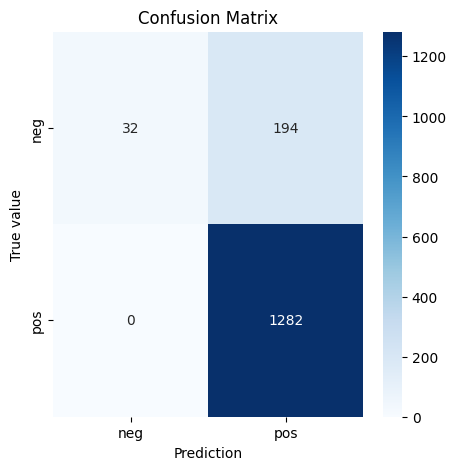

In [ ]:
plot_confusion(confusion_matrix(y_test, nb_pred))

In [ ]:
token_text = text_df['tokens_titletext']
tf_token = tf.transform(token_text)
nb_predictions = nbmodel.predict(tf_token)

# Mapping label prediksi ke label kelas ("pos" dan "neg")
label_map = {1: "pos", 0: "neg"}
nb_predicted_labels = [label_map[prediction] for prediction in nb_predictions]

# Menambahkan kolom prediksi ke dalam DataFrame
text_df['nb_pred'] = nb_predicted_labels

# Menampilkan DataFrame dengan kolom prediksi
text_df

,key,product_name,stars,com_titletext,b_star,b_score,tokens_titletext,nb_pred
1,0_bj,Salted Caramel Core,5,I’m OBSESSED with this pint! I decided to try ...,1.0,0.9442,"[obsess, pint, decid, tri, although, not, huge...",pos
3,0_bj,Salted Caramel Core,5,Obsessed!!! Why are people complaining about t...,1.0,0.9270,"[obsess, peopl, complain, blond, browni, not, ...",pos
4,0_bj,Salted Caramel Core,1,Worst Ice Cream Ever! This ice cream is worst ...,0.0,-0.7210,"[worst, ice, cream, ever, ice, cream, worst, i...",pos
5,0_bj,Salted Caramel Core,2,Way Too Salty I bought this last night to go w...,0.0,-0.8834,"[way, salti, bought, last, night, go, louisian...",pos
8,0_bj,Salted Caramel Core,2,"Could be better. I LOVE caramel, so much so th...",0.0,0.9550,"[could, better, love, caramel, much, could, ea...",pos
...,...,...,...,...,...,...,...,...
7938,56_bj,Peanut Butter Fudge Core,5,Peanut butter fudge heaven Oh man I use to be ...,1.0,0.9049,"[peanut, butter, fudg, heaven, oh, man, use, w...",pos
7939,56_bj,Peanut Butter Fudge Core,5,The best Chocolate Ice Cream Combo This is the...,1.0,0.8070,"[best, chocol, ice, cream, combo, first, choco...",pos
7940,56_bj,Peanut Butter Fudge Core,5,PERFECT!! This is the best pint of ice cream I...,1.0,0.9552,"[perfect, best, pint, ice, cream, ever, like, ...",pos
7941,56_bj,Peanut Butter Fudge Core,5,My favorite! This is my favorite ice cream eve...,1.0,0.8350,"[favorit, favorit, ice, cream, ever, not, get,...",pos


In [ ]:
text_df['nb_pred'].value_counts()

pos    7283
neg     253
Name: nb_pred, dtype: int64

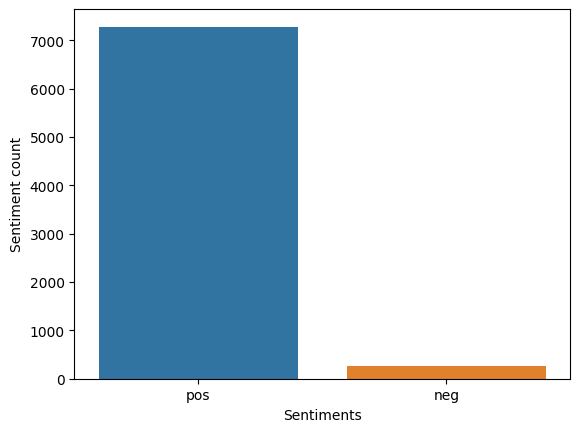

In [ ]:
text_df_sorted = text_df.sort_values('nb_pred', ascending=False)
ax = sns.countplot(x ='nb_pred', data = text_df_sorted)
ax.set(ylabel='Sentiment count', xlabel='Sentiments')
plt.show()

Text(0.5, 1.0, 'Sentiment distribution Naive Bayes Pie Chart')

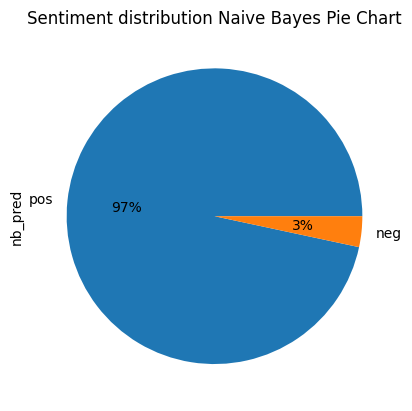

In [ ]:
text_df_sorted['nb_pred'].value_counts().plot.pie(autopct='%1.0f%%')
plt.title("Sentiment distribution Naive Bayes Pie Chart")

[Text(0, 0.5, 'Sentiment count'), Text(0.5, 0, 'Ice cream brand')]

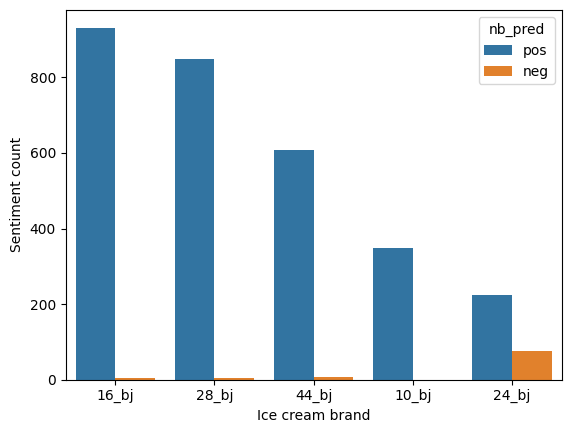

In [ ]:
# Top 10 ice cream brand sort by number of reviews
df_prod_reviewcount = text_df_sorted['key'].value_counts().head(5).reset_index()
df_prod_isin = text_df_sorted.loc[text_df_sorted['key'].isin(df_prod_reviewcount['index'])]
ax1 = sns.countplot(x ='key', hue='nb_pred', data = df_prod_isin, order = df_prod_isin['key'].value_counts().index)
ax1.set(ylabel='Sentiment count', xlabel='Ice cream brand')

[Text(0, 0.5, 'Sentiment count'), Text(0.5, 0, 'Ice Cream brand')]

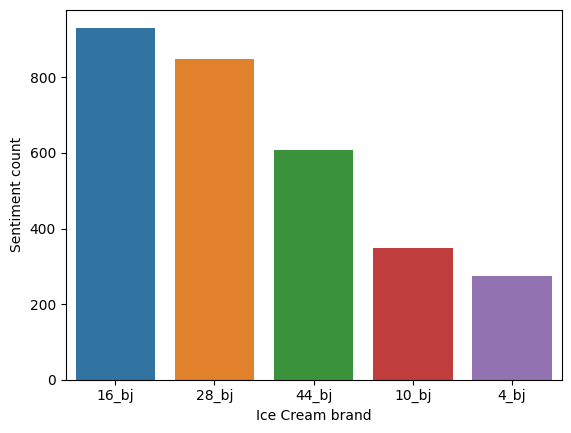

In [ ]:
# Top 5 ice cream brand sort by positive review
df_posreview = text_df_sorted.loc[text_df_sorted['nb_pred'] == 'pos']
df_prod_positivecount = df_posreview['key'].value_counts().head(5).reset_index()
ax2 = sns.barplot(x ='index', y= 'key', data = df_prod_positivecount)
ax2.set(ylabel='Sentiment count', xlabel='Ice Cream brand')

[Text(0, 0.5, 'Sentiment count'), Text(0.5, 0, 'Ice Cream brand')]

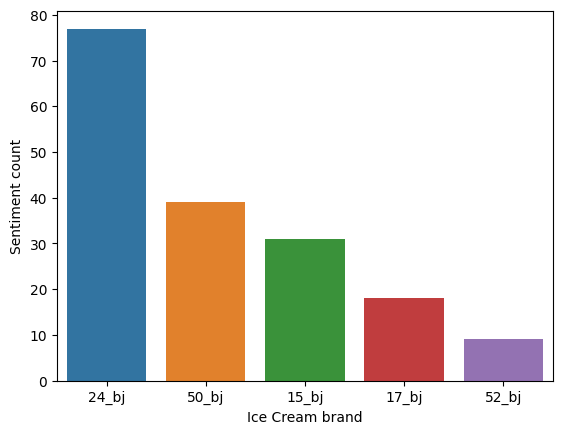

In [ ]:
# Top 5 ice cream brand sort by negative review
dfnegreview = text_df_sorted.loc[text_df_sorted['nb_pred'] == 'neg']
df_prod_negcount = dfnegreview['key'].value_counts().head(5).reset_index()
ax2 = sns.barplot(x ='index', y= 'key', data = df_prod_negcount)
ax2.set(ylabel='Sentiment count', xlabel='Ice Cream brand')

### 1.2 Logistic Regression

In [ ]:
import seaborn as sn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
# funtion to plot confusion matrix
def plot_confusion(cm):
  plt.figure(figsize = (5,5))
  x_axis_labels = ['neg','pos'] # labels for x-axis
  y_axis_labels = ['neg','pos'] # labels for y-axis
  sn.heatmap(cm, annot=True, cmap="Blues", fmt='.0f', xticklabels=x_axis_labels, yticklabels=y_axis_labels)
  plt.xlabel("Prediction")
  plt.ylabel("True value")
  plt.title("Confusion Matrix")
  return sn

In [ ]:
# create lr model
modelLr = LogisticRegression()
model_lr_tf = modelLr.fit(X_train_tf, y_train)
y_pred = model_lr_tf.predict(X_test_tf)

In [ ]:
# print lr model accuracy & report
print("LR Model Accuracy: {:.2%}".format(accuracy_score(y_test, y_pred)))
print(metrics.classification_report(y_test, y_pred, digits=3))

LR Model Accuracy: 93.77%
              precision    recall  f1-score   support

         0.0      0.923     0.637     0.754       226
         1.0      0.939     0.991     0.964      1282

    accuracy                          0.938      1508
   macro avg      0.931     0.814     0.859      1508
weighted avg      0.937     0.938     0.933      1508



<module 'seaborn' from '/usr/local/lib/python3.10/dist-packages/seaborn/__init__.py'>

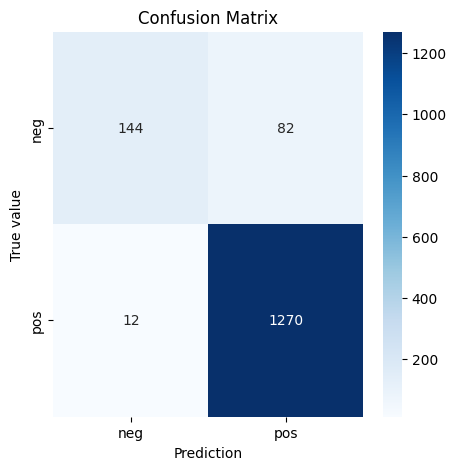

In [ ]:
# plot confusion
plot_confusion(confusion_matrix(y_test, y_pred))

In [ ]:
# predict review with lr model
token_text = text_df['tokens_titletext']
tf_token = tf.transform(token_text)
lr_predictions = model_lr_tf.predict(tf_token)
label_map = {1: "pos", 0: "neg"}
lr_predicted_labels = [label_map[prediction] for prediction in lr_predictions]
text_df['lr_pred'] = lr_predicted_labels

text_df

,key,product_name,stars,com_titletext,b_star,b_score,tokens_titletext,nb_pred,lr_pred
1,0_bj,Salted Caramel Core,5,I’m OBSESSED with this pint! I decided to try ...,1.0,0.9442,"[obsess, pint, decid, tri, although, not, huge...",pos,neg
3,0_bj,Salted Caramel Core,5,Obsessed!!! Why are people complaining about t...,1.0,0.9270,"[obsess, peopl, complain, blond, browni, not, ...",pos,pos
4,0_bj,Salted Caramel Core,1,Worst Ice Cream Ever! This ice cream is worst ...,0.0,-0.7210,"[worst, ice, cream, ever, ice, cream, worst, i...",pos,neg
5,0_bj,Salted Caramel Core,2,Way Too Salty I bought this last night to go w...,0.0,-0.8834,"[way, salti, bought, last, night, go, louisian...",pos,neg
8,0_bj,Salted Caramel Core,2,"Could be better. I LOVE caramel, so much so th...",0.0,0.9550,"[could, better, love, caramel, much, could, ea...",pos,pos
...,...,...,...,...,...,...,...,...,...
7938,56_bj,Peanut Butter Fudge Core,5,Peanut butter fudge heaven Oh man I use to be ...,1.0,0.9049,"[peanut, butter, fudg, heaven, oh, man, use, w...",pos,pos
7939,56_bj,Peanut Butter Fudge Core,5,The best Chocolate Ice Cream Combo This is the...,1.0,0.8070,"[best, chocol, ice, cream, combo, first, choco...",pos,pos
7940,56_bj,Peanut Butter Fudge Core,5,PERFECT!! This is the best pint of ice cream I...,1.0,0.9552,"[perfect, best, pint, ice, cream, ever, like, ...",pos,pos
7941,56_bj,Peanut Butter Fudge Core,5,My favorite! This is my favorite ice cream eve...,1.0,0.8350,"[favorit, favorit, ice, cream, ever, not, get,...",pos,pos


In [ ]:
text_df['lr_pred'].value_counts()

pos    6700
neg     836
Name: lr_pred, dtype: int64

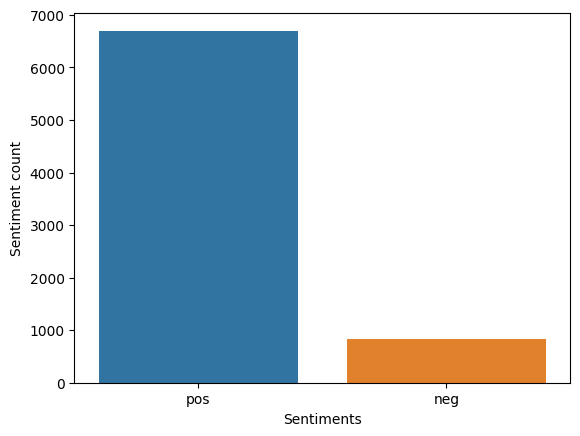

In [ ]:
# plot prediction result
text_df_sorted = text_df.sort_values('lr_pred', ascending=False)
ax = sns.countplot(x ='lr_pred', data = text_df_sorted)
ax.set(ylabel='Sentiment count', xlabel='Sentiments')
plt.show()

Text(0.5, 1.0, 'Sentiment distribution LR Pie Chart')

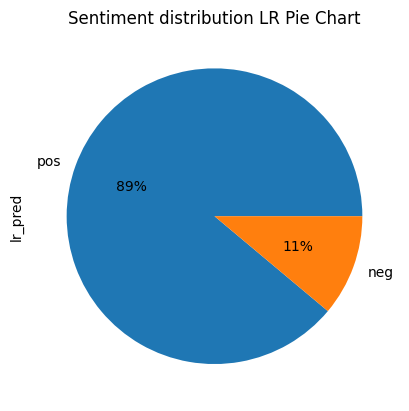

In [ ]:
text_df_sorted['lr_pred'].value_counts().plot.pie(autopct='%1.0f%%')
plt.title("Sentiment distribution LR Pie Chart")

[Text(0, 0.5, 'Sentiment count'), Text(0.5, 0, 'Ice cream brand')]

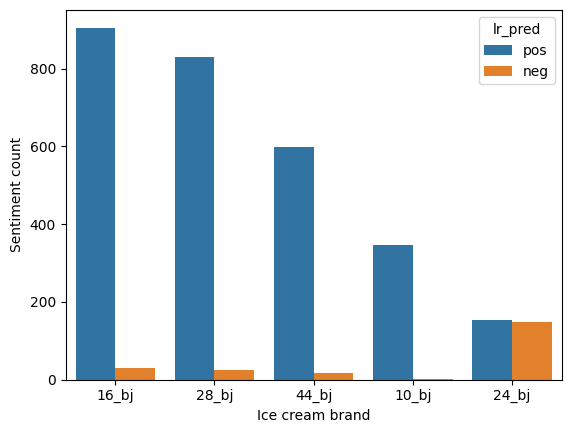

In [ ]:
# Top 10 ice cream brand sort by number of reviews
df_prod_reviewcount = text_df_sorted['key'].value_counts().head(5).reset_index()
df_prod_isin = text_df_sorted.loc[text_df_sorted['key'].isin(df_prod_reviewcount['index'])]
ax1 = sns.countplot(x ='key', hue='lr_pred', data = df_prod_isin, order = df_prod_isin['key'].value_counts().index)
ax1.set(ylabel='Sentiment count', xlabel='Ice cream brand')

[Text(0, 0.5, 'Sentiment count'), Text(0.5, 0, 'Ice cream brand')]

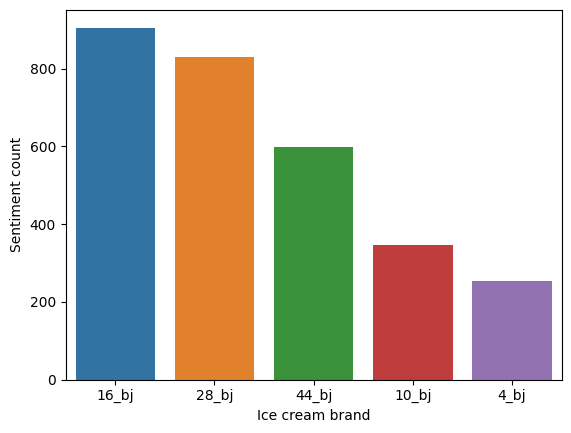

In [ ]:
# Top 5 ice cream brand sort by positive review
df_posreview = text_df_sorted.loc[text_df_sorted['lr_pred'] == 'pos']
df_prod_positivecount = df_posreview['key'].value_counts().head(5).reset_index()
ax2 = sns.barplot(x ='index', y= 'key', data = df_prod_positivecount)
ax2.set(ylabel='Sentiment count', xlabel='Ice cream brand')

[Text(0, 0.5, 'Sentiment count'), Text(0.5, 0, 'Ice cream brand')]

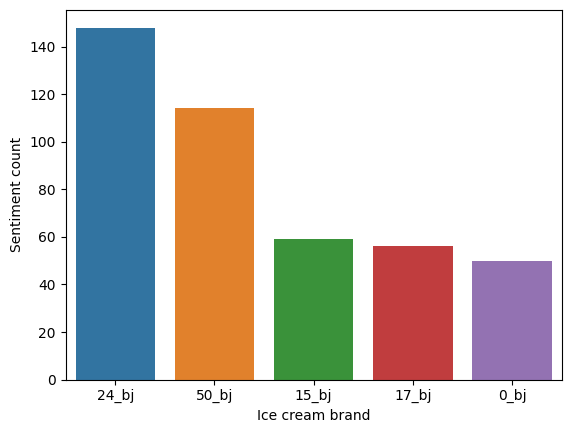

In [ ]:
# Top 5 ice cream brand sort by negative review
dfnegreview = text_df_sorted.loc[text_df_sorted['lr_pred'] == 'neg']
df_prod_negcount = dfnegreview['key'].value_counts().head(5).reset_index()
ax2 = sns.barplot(x ='index', y= 'key', data = df_prod_negcount)
ax2.set(ylabel='Sentiment count', xlabel='Ice cream brand')

## BALANCING DATA

In [ ]:
from sklearn.decomposition import PCA

def plot_2d_space(X, y, label='Classes'):
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']

    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X_pca[y == l, 0],
            X_pca[y == l, 1],
            c=c, label=l, marker=m
        )

    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

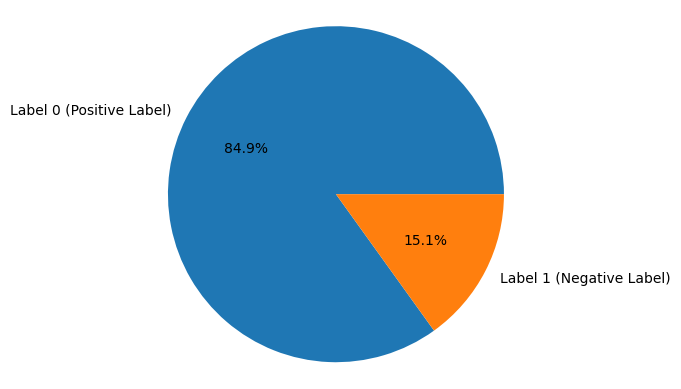

In [ ]:
# Class Imbalance Check
plt.pie(pd.Series(y_train).value_counts(),
        labels=['Label 0 (Positive Label)', 'Label 1 (Negative Label)'],
        autopct='%0.1f%%')
plt.axis('equal')
plt.show()

In [ ]:
from imblearn.over_sampling import SMOTE
# SMOTE on full training data
tf_full = fit_tfidf(X)
X_full_tf = tf_full.transform(X)
smote = SMOTE()
X_smote_full, y_smote_full = smote.fit_resample(X_full_tf, text_df['b_star'].values)
#SMOTE Training data
X_smote, y_smote = smote.fit_resample(X_train_tf, y_train)
# print(X_smote.shape, y_smote.shape)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


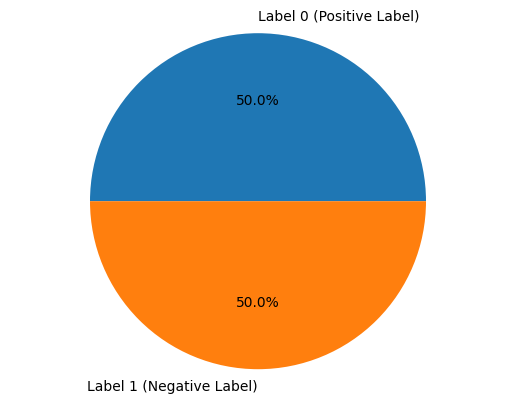

In [ ]:
# Class Imbalance Check
plt.pie(pd.value_counts(y_smote),
        labels=['Label 0 (Positive Label)', 'Label 1 (Negative Label)'],
        autopct='%0.1f%%')
plt.axis('equal')
plt.show()

In [ ]:
# # Menampilkan informasi jumlah sampel sebelum dilakukan balancing
# print("Jumlah sampel sebelum balancing:")
# print(text_df['b_star'].value_counts())

# # Melakukan balancing dataset
# n_samples = text_df['b_star'].value_counts().max()
# balanced_reviews = pd.concat([text_df[text_df['b_star'] == 1].sample(n=n_samples, replace=True, random_state=42),
#                               text_df[text_df['b_star'] == 0].sample(n=n_samples, replace=True, random_state=42)])

# # Menampilkan informasi jumlah sampel setelah dilakukan balancing
# print("Jumlah sampel setelah balancing:")
# print(balanced_reviews['b_star'].value_counts())

In [ ]:
# balanced_reviews

## 02 AFTER BALANCING

### 2.1 Naive Bayes

In [ ]:
# Membuat dan melatih model Naive Bayes
nbcl= nbmodel.fit(X_smote.toarray(), y_smote)

# Melakukan prediksi pada data uji
nb_pred= nbcl.predict(X_test_tf.toarray())

# Menghitung dan mencetak akurasi model
print("NB Model Accuracy: {:.2%}".format(accuracy_score(y_test, nb_pred)))

# Mencetak laporan klasifikasi
print(metrics.classification_report(y_test, nb_pred, digits=3))

NB Model Accuracy: 92.31%
              precision    recall  f1-score   support

         0.0      0.686     0.898     0.778       226
         1.0      0.981     0.927     0.953      1282

    accuracy                          0.923      1508
   macro avg      0.833     0.913     0.866      1508
weighted avg      0.937     0.923     0.927      1508



In [ ]:
def plot_confusion(cm):
  plt.figure(figsize = (5,5))
  x_axis_labels = ['neg','pos'] # labels for x-axis
  y_axis_labels = ['neg','pos'] # labels for y-axis
  sn.heatmap(cm, annot=True, cmap="Blues", fmt='.0f', xticklabels=x_axis_labels, yticklabels=y_axis_labels)
  plt.xlabel("Prediction")
  plt.ylabel("True value")
  plt.title("Confusion Matrix")
  return sn

<module 'seaborn' from '/usr/local/lib/python3.10/dist-packages/seaborn/__init__.py'>

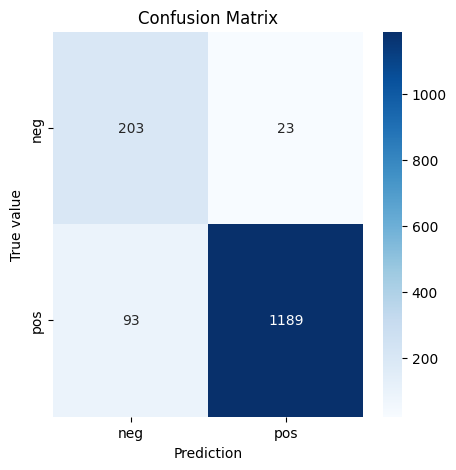

In [ ]:
plot_confusion(confusion_matrix(y_test, nb_pred))

In [ ]:
token_text = text_df['tokens_titletext']
tf_token = tf.transform(token_text)
nb_predictions = nbmodel.predict(tf_token)

# Mapping label prediksi ke label kelas ("pos" dan "neg")
label_map = {1: "pos", 0: "neg"}
nb_predicted_labels = [label_map[prediction] for prediction in nb_predictions]

# Menambahkan kolom prediksi ke dalam DataFrame
text_df['nb_pred_b'] = nb_predicted_labels

# Menampilkan DataFrame dengan kolom prediksi
text_df

,key,product_name,stars,com_titletext,b_star,b_score,tokens_titletext,nb_pred,lr_pred,nb_pred_b
1,0_bj,Salted Caramel Core,5,I’m OBSESSED with this pint! I decided to try ...,1.0,0.9442,"[obsess, pint, decid, tri, although, not, huge...",pos,neg,neg
3,0_bj,Salted Caramel Core,5,Obsessed!!! Why are people complaining about t...,1.0,0.9270,"[obsess, peopl, complain, blond, browni, not, ...",pos,pos,pos
4,0_bj,Salted Caramel Core,1,Worst Ice Cream Ever! This ice cream is worst ...,0.0,-0.7210,"[worst, ice, cream, ever, ice, cream, worst, i...",pos,neg,neg
5,0_bj,Salted Caramel Core,2,Way Too Salty I bought this last night to go w...,0.0,-0.8834,"[way, salti, bought, last, night, go, louisian...",pos,neg,neg
8,0_bj,Salted Caramel Core,2,"Could be better. I LOVE caramel, so much so th...",0.0,0.9550,"[could, better, love, caramel, much, could, ea...",pos,pos,neg
...,...,...,...,...,...,...,...,...,...,...
7938,56_bj,Peanut Butter Fudge Core,5,Peanut butter fudge heaven Oh man I use to be ...,1.0,0.9049,"[peanut, butter, fudg, heaven, oh, man, use, w...",pos,pos,pos
7939,56_bj,Peanut Butter Fudge Core,5,The best Chocolate Ice Cream Combo This is the...,1.0,0.8070,"[best, chocol, ice, cream, combo, first, choco...",pos,pos,pos
7940,56_bj,Peanut Butter Fudge Core,5,PERFECT!! This is the best pint of ice cream I...,1.0,0.9552,"[perfect, best, pint, ice, cream, ever, like, ...",pos,pos,pos
7941,56_bj,Peanut Butter Fudge Core,5,My favorite! This is my favorite ice cream eve...,1.0,0.8350,"[favorit, favorit, ice, cream, ever, not, get,...",pos,pos,pos


In [ ]:
text_df['nb_pred_b'].value_counts()

pos    6055
neg    1481
Name: nb_pred_b, dtype: int64

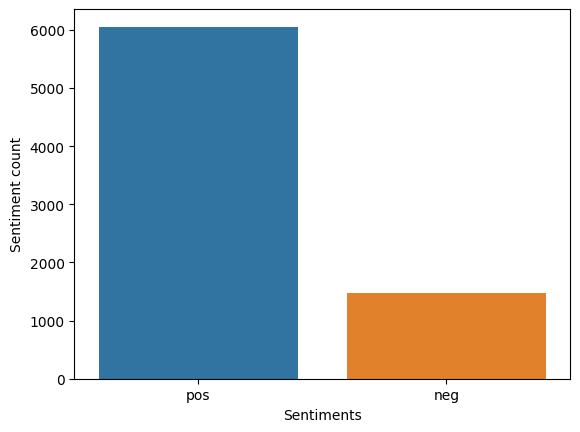

In [ ]:
text_df_sorted = text_df.sort_values('nb_pred_b', ascending=False)
ax = sns.countplot(x ='nb_pred_b', data = text_df_sorted)
ax.set(ylabel='Sentiment count', xlabel='Sentiments')
plt.show()

Text(0.5, 1.0, 'Sentiment distribution Naive Bayes Pie Chart')

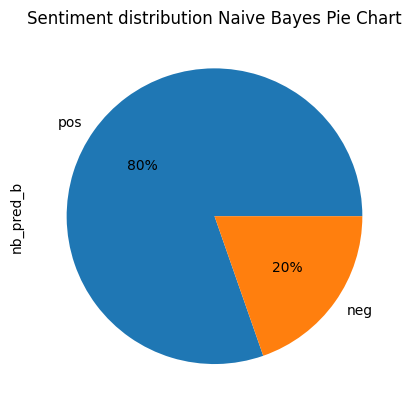

In [ ]:
text_df_sorted['nb_pred_b'].value_counts().plot.pie(autopct='%1.0f%%')
plt.title("Sentiment distribution Naive Bayes Pie Chart")

[Text(0, 0.5, 'Sentiment count'), Text(0.5, 0, 'Ice cream brand')]

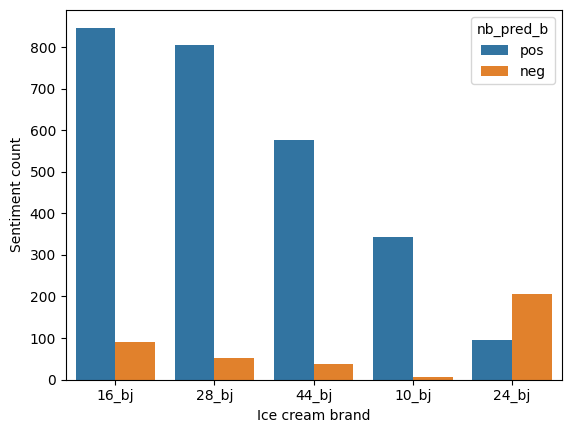

In [ ]:
# Top 10 ice cream brand sort by number of reviews
df_prod_reviewcount = text_df_sorted['key'].value_counts().head(5).reset_index()
df_prod_isin = text_df_sorted.loc[text_df_sorted['key'].isin(df_prod_reviewcount['index'])]
ax1 = sns.countplot(x ='key', hue='nb_pred_b', data = df_prod_isin, order = df_prod_isin['key'].value_counts().index)
ax1.set(ylabel='Sentiment count', xlabel='Ice cream brand')

[Text(0, 0.5, 'Sentiment count'), Text(0.5, 0, 'Ice Cream brand')]

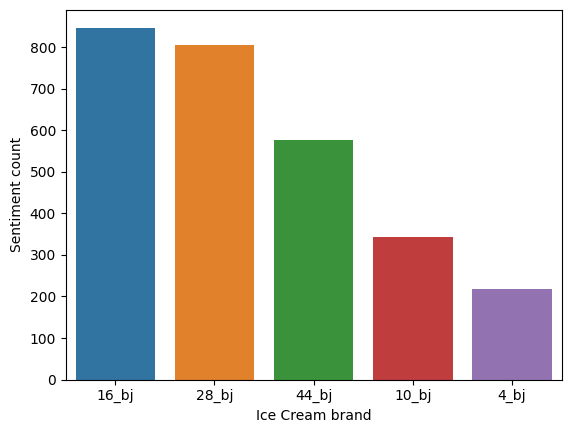

In [ ]:
# Top 5 ice cream brand sort by positive review
df_posreview = text_df_sorted.loc[text_df_sorted['nb_pred_b'] == 'pos']
df_prod_positivecount = df_posreview['key'].value_counts().head(5).reset_index()
ax2 = sns.barplot(x ='index', y= 'key', data = df_prod_positivecount)
ax2.set(ylabel='Sentiment count', xlabel='Ice Cream brand')

In [ ]:
df_prod_positivecount

,index,key
0,16_bj,847
1,28_bj,804
2,44_bj,577
3,10_bj,342
4,4_bj,219


[Text(0, 0.5, 'Sentiment count'), Text(0.5, 0, 'Ice Cream brand')]

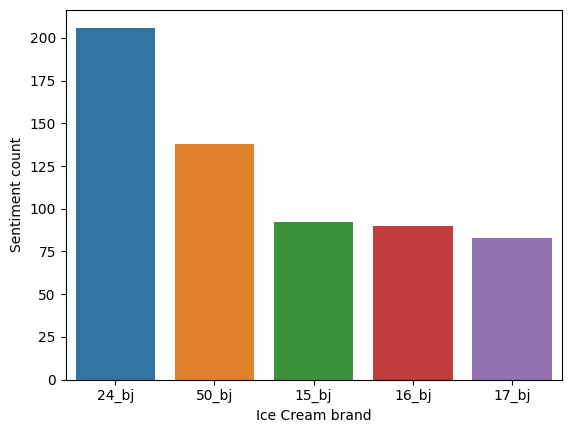

In [ ]:
# Top 5 ice cream brand sort by negative review
dfnegreview = text_df_sorted.loc[text_df_sorted['nb_pred_b'] == 'neg']
df_prod_negcount = dfnegreview['key'].value_counts().head(5).reset_index()
ax2 = sns.barplot(x ='index', y= 'key', data = df_prod_negcount)
ax2.set(ylabel='Sentiment count', xlabel='Ice Cream brand')

In [ ]:
df_prod_negcount

,index,key
0,24_bj,206
1,50_bj,138
2,15_bj,92
3,16_bj,90
4,17_bj,83


### 2.2 Logistic Regression

In [ ]:
# funtion to plot confusion matrix
def plot_confusion(cm):
  plt.figure(figsize = (5,5))
  x_axis_labels = ['neg','pos'] # labels for x-axis
  y_axis_labels = ['neg','pos'] # labels for y-axis
  sn.heatmap(cm, annot=True, cmap="Blues", fmt='.0f', xticklabels=x_axis_labels, yticklabels=y_axis_labels)
  plt.xlabel("Prediction")
  plt.ylabel("True value")
  plt.title("Confusion Matrix")
  return sn

In [ ]:
# create lr model
modelLr = LogisticRegression()
model_lr_tf = modelLr.fit(X_smote, y_smote)
y_pred = model_lr_tf.predict(X_test_tf)

In [ ]:
# print lr model accuracy & report
print("LR Model Accuracy: {:.2%}".format(accuracy_score(y_test, y_pred)))
print(metrics.classification_report(y_test, y_pred, digits=3))

LR Model Accuracy: 94.56%
              precision    recall  f1-score   support

         0.0      0.773     0.903     0.833       226
         1.0      0.982     0.953     0.968      1282

    accuracy                          0.946      1508
   macro avg      0.878     0.928     0.900      1508
weighted avg      0.951     0.946     0.947      1508



<module 'seaborn' from '/usr/local/lib/python3.10/dist-packages/seaborn/__init__.py'>

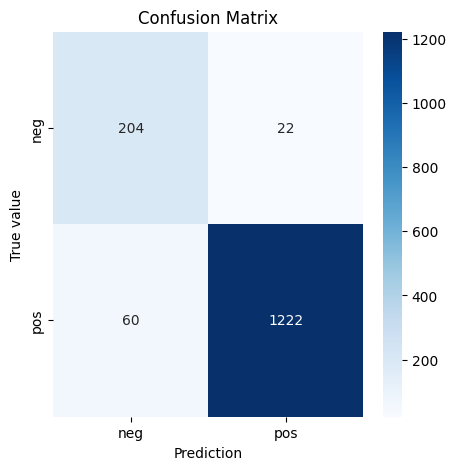

In [ ]:
# plot confusion
plot_confusion(confusion_matrix(y_test, y_pred))

In [ ]:
# predict review with lr model
token_text = text_df['tokens_titletext']
tf_token = tf.transform(token_text)
lr_predictions = model_lr_tf.predict(tf_token)
label_map = {1: "pos", 0: "neg"}
lr_predicted_labels = [label_map[prediction] for prediction in lr_predictions]
text_df['lr_pred_b'] = lr_predicted_labels

text_df

,key,product_name,stars,com_titletext,b_star,b_score,tokens_titletext,nb_pred,lr_pred,nb_pred_b,lr_pred_b
1,0_bj,Salted Caramel Core,5,I’m OBSESSED with this pint! I decided to try ...,1.0,0.9442,"[obsess, pint, decid, tri, although, not, huge...",pos,neg,neg,neg
3,0_bj,Salted Caramel Core,5,Obsessed!!! Why are people complaining about t...,1.0,0.9270,"[obsess, peopl, complain, blond, browni, not, ...",pos,pos,pos,pos
4,0_bj,Salted Caramel Core,1,Worst Ice Cream Ever! This ice cream is worst ...,0.0,-0.7210,"[worst, ice, cream, ever, ice, cream, worst, i...",pos,neg,neg,neg
5,0_bj,Salted Caramel Core,2,Way Too Salty I bought this last night to go w...,0.0,-0.8834,"[way, salti, bought, last, night, go, louisian...",pos,neg,neg,neg
8,0_bj,Salted Caramel Core,2,"Could be better. I LOVE caramel, so much so th...",0.0,0.9550,"[could, better, love, caramel, much, could, ea...",pos,pos,neg,neg
...,...,...,...,...,...,...,...,...,...,...,...
7938,56_bj,Peanut Butter Fudge Core,5,Peanut butter fudge heaven Oh man I use to be ...,1.0,0.9049,"[peanut, butter, fudg, heaven, oh, man, use, w...",pos,pos,pos,pos
7939,56_bj,Peanut Butter Fudge Core,5,The best Chocolate Ice Cream Combo This is the...,1.0,0.8070,"[best, chocol, ice, cream, combo, first, choco...",pos,pos,pos,pos
7940,56_bj,Peanut Butter Fudge Core,5,PERFECT!! This is the best pint of ice cream I...,1.0,0.9552,"[perfect, best, pint, ice, cream, ever, like, ...",pos,pos,pos,pos
7941,56_bj,Peanut Butter Fudge Core,5,My favorite! This is my favorite ice cream eve...,1.0,0.8350,"[favorit, favorit, ice, cream, ever, not, get,...",pos,pos,pos,pos


In [ ]:
text_df['lr_pred_b'].value_counts()

pos    6219
neg    1317
Name: lr_pred_b, dtype: int64

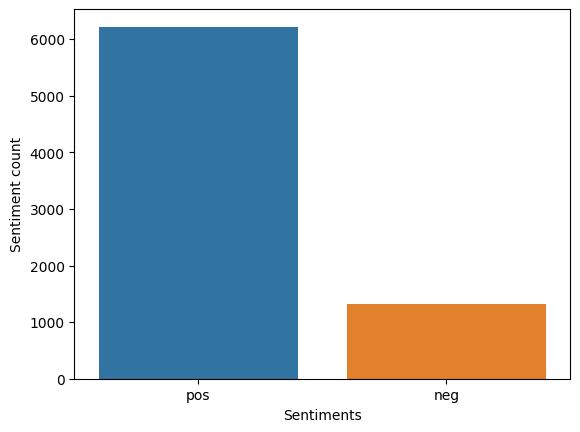

In [ ]:
# plot prediction result
text_df_sorted = text_df.sort_values('lr_pred_b', ascending=False)
ax = sns.countplot(x ='lr_pred_b', data = text_df_sorted)
ax.set(ylabel='Sentiment count', xlabel='Sentiments')
plt.show()

Text(0.5, 1.0, 'Sentiment distribution LR Pie Chart')

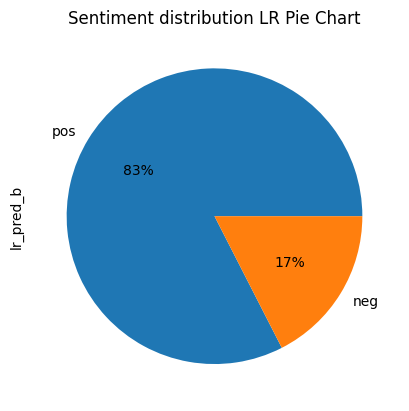

In [ ]:
text_df_sorted['lr_pred_b'].value_counts().plot.pie(autopct='%1.0f%%')
plt.title("Sentiment distribution LR Pie Chart")

[Text(0, 0.5, 'Sentiment count'), Text(0.5, 0, 'Ice cream brand')]

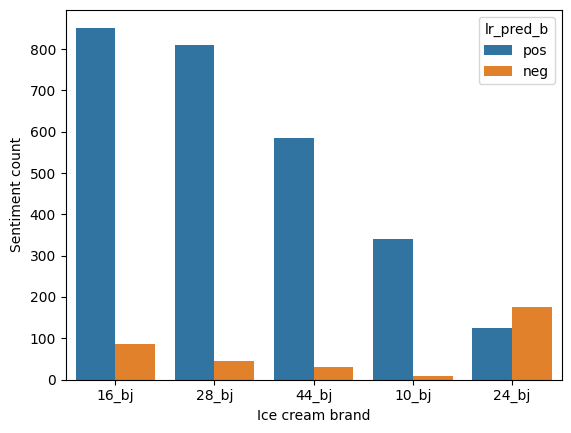

In [ ]:
# Top 10 ice cream brand sort by number of reviews
df_prod_reviewcount = text_df_sorted['key'].value_counts().head(5).reset_index()
df_prod_isin = text_df_sorted.loc[text_df_sorted['key'].isin(df_prod_reviewcount['index'])]
ax1 = sns.countplot(x ='key', hue='lr_pred_b', data = df_prod_isin, order = df_prod_isin['key'].value_counts().index)
ax1.set(ylabel='Sentiment count', xlabel='Ice cream brand')

In [ ]:
df_prod_reviewcount

,index,key
0,16_bj,937
1,28_bj,855
2,44_bj,614
3,10_bj,349
4,24_bj,301


[Text(0, 0.5, 'Sentiment count'), Text(0.5, 0, 'Ice cream brand')]

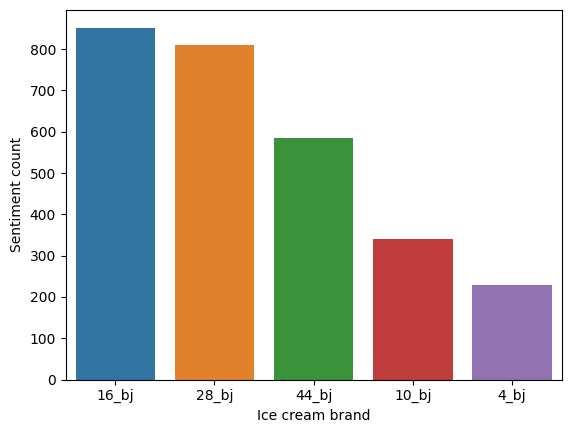

In [ ]:
# Top 5 ice cream brand sort by positive review
df_posreview = text_df_sorted.loc[text_df_sorted['lr_pred_b'] == 'pos']
df_prod_positivecount = df_posreview['key'].value_counts().head(5).reset_index()
ax2 = sns.barplot(x ='index', y= 'key', data = df_prod_positivecount)
ax2.set(ylabel='Sentiment count', xlabel='Ice cream brand')

In [ ]:
df_prod_positivecount

,index,key
0,16_bj,852
1,28_bj,809
2,44_bj,584
3,10_bj,341
4,4_bj,228


[Text(0, 0.5, 'Sentiment count'), Text(0.5, 0, 'Ice cream brand')]

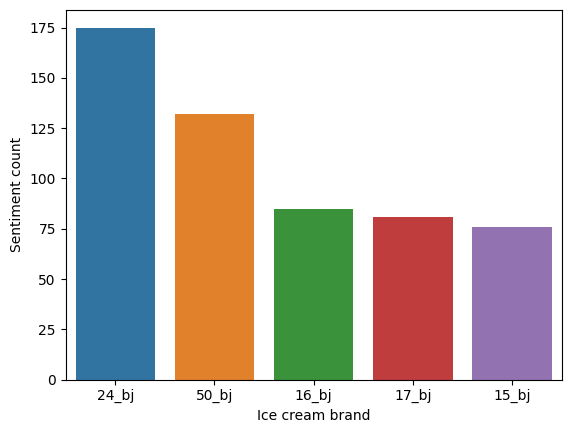

In [ ]:
# Top 5 ice cream brand sort by negative review
dfnegreview = text_df_sorted.loc[text_df_sorted['lr_pred_b'] == 'neg']
df_prod_negcount = dfnegreview['key'].value_counts().head(5).reset_index()
ax2 = sns.barplot(x ='index', y= 'key', data = df_prod_negcount)
ax2.set(ylabel='Sentiment count', xlabel='Ice cream brand')

In [ ]:
df_prod_negcount

,index,key
0,24_bj,175
1,50_bj,132
2,16_bj,85
3,17_bj,81
4,15_bj,76


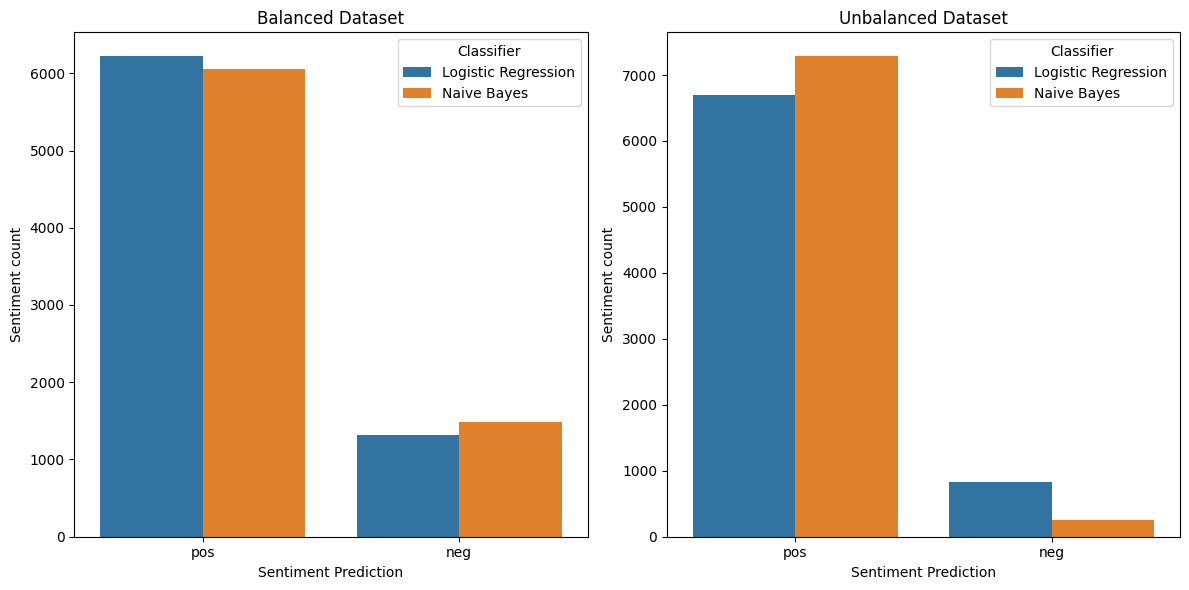

In [ ]:
# Reshape the data for plotting
balanced_melted = pd.melt(text_df_sorted, value_vars=['lr_pred_b', 'nb_pred_b'],
                          var_name='Classifier', value_name='Sentiment')
unbalanced_melted = pd.melt(text_df_sorted, value_vars=['lr_pred', 'nb_pred'],
                            var_name='Classifier', value_name='Sentiment')

# Rename the classifier labels
balanced_melted['Classifier'] = balanced_melted['Classifier'].map({
    'lr_pred_b': 'Logistic Regression',
    'nb_pred_b': 'Naive Bayes'
})
unbalanced_melted['Classifier'] = unbalanced_melted['Classifier'].map({
    'lr_pred': 'Logistic Regression',
    'nb_pred': 'Naive Bayes'
})

# Plotting
plt.figure(figsize=(12, 6))
ax1 = plt.subplot(1, 2, 1)
sns.countplot(x='Sentiment', hue='Classifier', data=balanced_melted, ax=ax1)
ax1.set_ylabel('Sentiment count')
ax1.set_xlabel('Sentiment Prediction')
ax1.set_title('Balanced Dataset')

ax2 = plt.subplot(1, 2, 2)
sns.countplot(x='Sentiment', hue='Classifier', data=unbalanced_melted, ax=ax2)
ax2.set_ylabel('Sentiment count')
ax2.set_xlabel('Sentiment Prediction')
ax2.set_title('Unbalanced Dataset')

plt.tight_layout()
plt.show()

In [ ]:
balanced_melted['Classifier'].value_counts()

Logistic Regression    7536
Naive Bayes            7536
Name: Classifier, dtype: int64

In [ ]:
unbalanced_melted['Classifier'].value_counts()

Logistic Regression    7536
Naive Bayes            7536
Name: Classifier, dtype: int64